In [1]:
"""Import necessary packages/libraries"""

import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from divorce import explore_data_characteristics, isnull, age_and_marital_status_stats, make_love_divorce, make_married_30_plus

In [2]:
'''Import the data'''
divorce = pd.read_csv("divorce_df.csv") 

In [3]:
"""Calls the functions """
if divorce is not None:
    explore_data_characteristics(divorce)
    isnull(divorce)
    age_and_marital_status_stats(divorce)

Divorce Head:     age_at_marriage  marriage_duration_years  num_children  \
0               30                        1             1   
1               27                        2             2   
2               31                        6             0   
3               35                        3             2   
4               26                        2             2   

       education_level employment_status  combined_income  \
0             Bachelor         Full-time            64001   
1               Master         Full-time            86221   
2          High School         Part-time            69441   
3             Bachelor         Full-time            69513   
4  No Formal Education         Full-time            63986   

  religious_compatibility  cultural_background_match  communication_score  \
0      Different Religion                          1             5.536016   
1           Same Religion                          1             5.810172   
2           Same Rel

In [4]:
"""Filter Exploration"""
print(
    divorce["marriage_type"].value_counts()
)  # Count the number of couples in each marriage type.
# This is to ensure that there is enough data in the 'Love' type to conduct our analysis.'''

marriage_type
Love        3513
Arranged    1231
Other        256
Name: count, dtype: int64


In [5]:
'''Show the filtered dataset'''
love_divorce = make_love_divorce(divorce) 

In [6]:
'''Create a dataframe that only includes couples who got married at age 30 or after '''
married_30_plus = make_married_30_plus(
    love_divorce
)

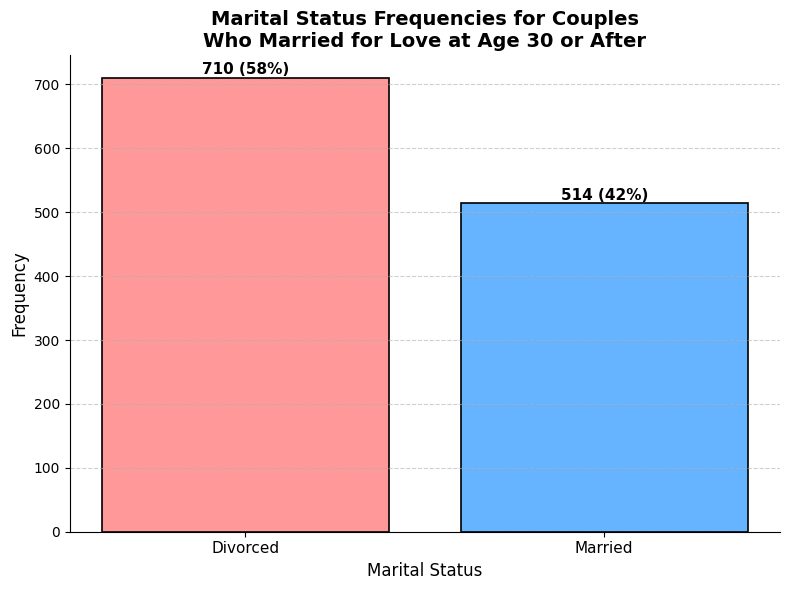

In [7]:
# Count values and calculate proportions
counts = married_30_plus["divorced"].value_counts()
proportions = counts / counts.sum()

# Define custom colors for bars
colors = ["#FF9999", "#66B3FF"]  # Divorced, Married

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars with custom colors and edge outlines
bars = ax.bar(
    x=counts.index,
    height=counts.values,
    color=colors,
    edgecolor="black",
    linewidth=1.2
)

# Annotate each bar with count and proportion
for bar, count, prop in zip(bars, counts, proportions):
    label = f"{count} ({prop:.0%})"
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1,
        label,
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold"
    )

# Customize axes and labels
ax.set_xlabel("Marital Status", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
ax.set_xticks([0, 1])
ax.set_xticklabels(["Divorced", "Married"], fontsize=11)
ax.set_title(
    "Marital Status Frequencies for Couples\nWho Married for Love at Age 30 or After",
    fontsize=14,
    fontweight="bold"
)

# Add horizontal gridlines
ax.yaxis.grid(True, linestyle="--", alpha=0.6)

# Remove top and right borders for a cleaner look
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.savefig("married_30_plus.png")
plt.show()

In [8]:
""" Encode the categorical data. The OrdinalEcoder encodes ordinal variables, while the OneHotEncoder encodes norminal variables"""
ordencoder = OrdinalEncoder(
    categories=[["No Formal Education", "High School", "Bachelor", "Master", "PhD"]]
)  # Establish the OrdinalEncoder with the appropriate category order for the education level
love_divorce["education_level_enc"] = ordencoder.fit_transform(
    love_divorce[["education_level"]]
)  # Encode the education level
love_divorce.head()  # Check if the data was encoded correctly

ohencoder = OneHotEncoder(sparse_output=False)  # Establish the OneHotEncoder
nom_cols = [
    "employment_status",
    "religious_compatibility",
    "conflict_resolution_style",
]  # Create a list of the nominal variables
love_divorce_encoded = pd.DataFrame(
    ohencoder.fit_transform(love_divorce.loc[:, nom_cols]),
    columns=ohencoder.get_feature_names_out(nom_cols),
)  # Create a new dataframe with the encoded nominal variables


love_divorce_final = pd.concat(
    [
        love_divorce.drop(columns=nom_cols + ["education_level"]).reset_index(
            drop=True
        ),
        love_divorce_encoded.reset_index(drop=True),
    ],
    axis=1,
)  # Create a new dataframe where the encoded categorical variables
# are included with the rest of the data and the unecoded categorical variables are removed
love_divorce_final.head()  # Show the prepared dataset


,age_at_marriage,marriage_duration_years,num_children,combined_income,cultural_background_match,communication_score,conflict_frequency,financial_stress_level,mental_health_issues,infidelity_occurred,...,employment_status_Homemaker,employment_status_Part-time,employment_status_Unemployed,religious_compatibility_Different Religion,religious_compatibility_Not Religious,religious_compatibility_Same Religion,conflict_resolution_style_Aggressive,conflict_resolution_style_Avoidant,conflict_resolution_style_Collaborative,conflict_resolution_style_Passive
0,30,1,1,64001,1,5.536016,3,6.026355,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,27,2,2,86221,1,5.810172,3,1.000000,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,35,3,2,69513,1,6.212046,3,4.893633,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,26,2,2,63986,1,4.826262,1,9.431154,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,26,10,0,44605,0,6.825964,3,9.118268,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [9]:
"""Perform logistic regression"""
X = love_divorce_final.drop(columns="divorced")  # Create feature set
y = love_divorce_final["divorced"]  # Create target set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)  # Split data into training and test sets.
# 70 % of the data will be in the training set, while 30 % will be in the test set
logreg = LogisticRegression()  # Establish the model
logreg.fit(X_train, y_train)  # Fit the model
y_pred = logreg.predict(X_test)  # Make marital status predictions
print(
    "Accuracy", accuracy_score(y_test, y_pred)
)  # Evaluate the model's performance based on its accuracy

coefs = pd.DataFrame(
    {"Features": X_train.columns, "Coefficients": np.exp(logreg.coef_[0])}
)  # Obtain the model coefficients.
# The exponent of the coefficients is used so the coefficients can be interpreted as odds.
print(coefs)  # Show the coefficients

Accuracy 0.5986717267552182
                                      Features  Coefficients
0                              age_at_marriage      0.993426
1                      marriage_duration_years      1.000927
2                                 num_children      0.999790
3                              combined_income      1.000002
4                    cultural_background_match      0.985445
5                          communication_score      0.908803
6                           conflict_frequency      1.012803
7                       financial_stress_level      1.093707
8                         mental_health_issues      1.018564
9                          infidelity_occurred      1.080554
10                         counseling_attended      1.028414
11                              social_support      0.992521
12                        shared_hobbies_count      0.982446
13                    pre_marital_cohabitation      0.983947
14                   domestic_violence_history      1.050

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
